# Análisis exploratorio de una base de datos de películas

Usa la base de datos `./data/imdb.csv`


### 1. Importar `pandas`, `matplotlib` y `numpy`

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

### 2. Leer la base de datos del archivo csv a pandas

In [7]:
df = pd.read_csv('/imdb.csv')

### 3. Mostrar las  primeras y últimas filas del dataframe. Hacerlo con el valor default y pasando como argumento el número entero de filas que se deseen inspeccionar.

In [13]:
df.tail(5)

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
995,996,Secret in Their Eyes,"Crime,Drama,Mystery","A tight-knit team of rising investigators, alo...",Billy Ray,"Chiwetel Ejiofor, Nicole Kidman, Julia Roberts...",2015,111,6.2,27585,NaN,45.0
996,997,Hostel: Part II,Horror,Three American college students studying abroa...,Eli Roth,"Lauren German, Heather Matarazzo, Bijou Philli...",2007,94,5.5,73152,17.54,46.0
997,998,Step Up 2: The Streets,"Drama,Music,Romance",Romantic sparks occur between two dance studen...,Jon M. Chu,"Robert Hoffman, Briana Evigan, Cassie Ventura,...",2008,98,6.2,70699,58.01,50.0
998,999,Search Party,"Adventure,Comedy",A pair of friends embark on a mission to reuni...,Scot Armstrong,"Adam Pally, T.J. Miller, Thomas Middleditch,Sh...",2014,93,5.6,4881,NaN,22.0
999,1000,Nine Lives,"Comedy,Family,Fantasy",A stuffy businessman finds himself trapped ins...,Barry Sonnenfeld,"Kevin Spacey, Jennifer Garner, Robbie Amell,Ch...",2016,87,5.3,12435,19.64,11.0


### 4. Continúa inspeccionando el archivo viendo todas las columnas del

---


In [14]:
display(df.columns)

Index(['Rank', 'Title', 'Genre', 'Description', 'Director', 'Actors', 'Year',
       'Runtime (Minutes)', 'Rating', 'Votes', 'Revenue (Millions)',
       'Metascore'],
      dtype='object')

### 5. Imprime los primeros valores de la variable `Rank`

In [15]:
print(df['Rank'].head())

0    1
1    2
2    3
3    4
4    5
Name: Rank, dtype: int64


### 6. Demuestra que es mejor tener nombres de columnas sin espacios (notación corchetes y notación punto-variable).

In [16]:
df.runtime (minutes)

AttributeError: 'DataFrame' object has no attribute 'runtime'

### 7. Renombra las columnas que tengan espacios

> Agregar bloque entrecomillado



In [17]:
df = df.rename(columns={'Runtime (Minutes)': 'Runtime_Minutes', 'Revenue (Millions)': 'Revenue_Millions', 'Metascore': 'Metascore'})
display(df.columns)

Index(['Rank', 'Title', 'Genre', 'Description', 'Director', 'Actors', 'Year',
       'Runtime_Minutes', 'Rating', 'Votes', 'Revenue_Millions', 'Metascore'],
      dtype='object')

In [19]:
print(df.Runtime_Minutes.head())

0    121
1    124
2    117
3    108
4    123
Name: Runtime_Minutes, dtype: int64


### 8. Utiliza tus nuevas columnas sin espacios :)

In [21]:
print(df.Runtime_Minutes.head())

0    121
1    124
2    117
3    108
4    123
Name: Runtime_Minutes, dtype: int64


### 9. Visualiza la info de todo tu dataframe

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Rank              1000 non-null   int64  
 1   Title             1000 non-null   object 
 2   Genre             1000 non-null   object 
 3   Description       1000 non-null   object 
 4   Director          1000 non-null   object 
 5   Actors            1000 non-null   object 
 6   Year              1000 non-null   int64  
 7   Runtime_Minutes   1000 non-null   int64  
 8   Rating            1000 non-null   float64
 9   Votes             1000 non-null   int64  
 10  Revenue_Millions  872 non-null    float64
 11  Metascore         936 non-null    float64
dtypes: float64(3), int64(4), object(5)
memory usage: 93.9+ KB


### 10. Inspecciona si hay columnas que tengan valores `NA`

In [23]:
df.isnull().sum()

,0
Rank,0
Title,0
Genre,0
Description,0
Director,0
Actors,0
Year,0
Runtime_Minutes,0
Rating,0
Votes,0


### 11. Imprime el número total de valores NA que haya en cada columna. Hazlo primero para la columna `Metascore` y después utiliza un ciclo for para hacerlo para todas las columnas

In [24]:
print(f"NA values in Metascore: {df['Metascore'].isnull().sum()}")

print("\nNA values for all columns:")
for column in df.columns:
    print(f"{column}: {df[column].isnull().sum()}")

NA values in Metascore: 64

NA values for all columns:
Rank: 0
Title: 0
Genre: 0
Description: 0
Director: 0
Actors: 0
Year: 0
Runtime_Minutes: 0
Rating: 0
Votes: 0
Revenue_Millions: 128
Metascore: 64


### 12. Usa la magia de `dropna()`

In [25]:
df_cleaned = df.dropna()
print(f"Original DataFrame shape: {df.shape}")
print(f"Cleaned DataFrame shape: {df_cleaned.shape}")

Original DataFrame shape: (1000, 12)
Cleaned DataFrame shape: (838, 12)


In [27]:
df_cleaned.describe()

,Rank,Year,Runtime_Minutes,Rating,Votes,Revenue_Millions,Metascore
count,838.000000,838.00000,838.000000,838.000000,8.380000e+02,838.000000,838.000000
mean,485.247017,2012.50716,114.638425,6.814320,1.932303e+05,84.564558,59.575179
std,286.572065,3.17236,18.470922,0.877754,1.930990e+05,104.520227,16.952416
min,1.000000,2006.00000,66.000000,1.900000,1.780000e+02,0.000000,11.000000
25%,238.250000,2010.00000,101.000000,6.300000,6.127650e+04,13.967500,47.000000
50%,475.500000,2013.00000,112.000000,6.900000,1.368795e+05,48.150000,60.000000
75%,729.750000,2015.00000,124.000000,7.500000,2.710830e+05,116.800000,72.000000
max,1000.000000,2016.00000,187.000000,9.000000,1.791916e+06,936.630000,100.000000


In [26]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 838 entries, 0 to 999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Rank              838 non-null    int64  
 1   Title             838 non-null    object 
 2   Genre             838 non-null    object 
 3   Description       838 non-null    object 
 4   Director          838 non-null    object 
 5   Actors            838 non-null    object 
 6   Year              838 non-null    int64  
 7   Runtime_Minutes   838 non-null    int64  
 8   Rating            838 non-null    float64
 9   Votes             838 non-null    int64  
 10  Revenue_Millions  838 non-null    float64
 11  Metascore         838 non-null    float64
dtypes: float64(3), int64(4), object(5)
memory usage: 85.1+ KB


### 13. Vuelve a ver la info del dataset

In [28]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 838 entries, 0 to 999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Rank              838 non-null    int64  
 1   Title             838 non-null    object 
 2   Genre             838 non-null    object 
 3   Description       838 non-null    object 
 4   Director          838 non-null    object 
 5   Actors            838 non-null    object 
 6   Year              838 non-null    int64  
 7   Runtime_Minutes   838 non-null    int64  
 8   Rating            838 non-null    float64
 9   Votes             838 non-null    int64  
 10  Revenue_Millions  838 non-null    float64
 11  Metascore         838 non-null    float64
dtypes: float64(3), int64(4), object(5)
memory usage: 85.1+ KB


### 14. Genera estadísticos descriptivos con el método `describe()`

In [29]:
df_cleaned.describe()

,Rank,Year,Runtime_Minutes,Rating,Votes,Revenue_Millions,Metascore
count,838.000000,838.00000,838.000000,838.000000,8.380000e+02,838.000000,838.000000
mean,485.247017,2012.50716,114.638425,6.814320,1.932303e+05,84.564558,59.575179
std,286.572065,3.17236,18.470922,0.877754,1.930990e+05,104.520227,16.952416
min,1.000000,2006.00000,66.000000,1.900000,1.780000e+02,0.000000,11.000000
25%,238.250000,2010.00000,101.000000,6.300000,6.127650e+04,13.967500,47.000000
50%,475.500000,2013.00000,112.000000,6.900000,1.368795e+05,48.150000,60.000000
75%,729.750000,2015.00000,124.000000,7.500000,2.710830e+05,116.800000,72.000000
max,1000.000000,2016.00000,187.000000,9.000000,1.791916e+06,936.630000,100.000000


### 15. Crea un histograma de la variable Metascore. Utiliza 10 cubetas

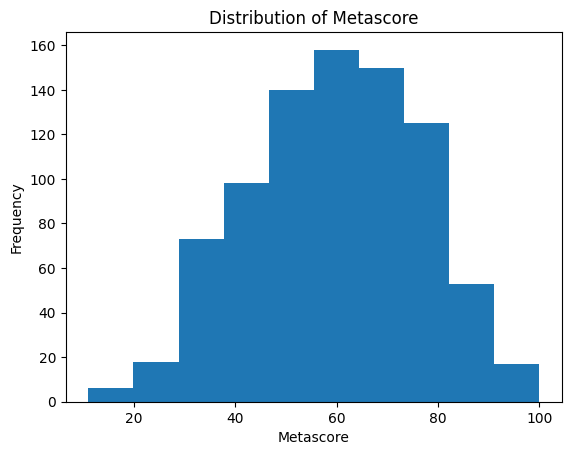

In [30]:
plt.hist(df_cleaned['Metascore'], bins=10)
plt.title('Distribution of Metascore')
plt.xlabel('Metascore')
plt.ylabel('Frequency')
plt.show()

### 16. Crea un histograma de la variable Rating. Utiliza 10 cubetas

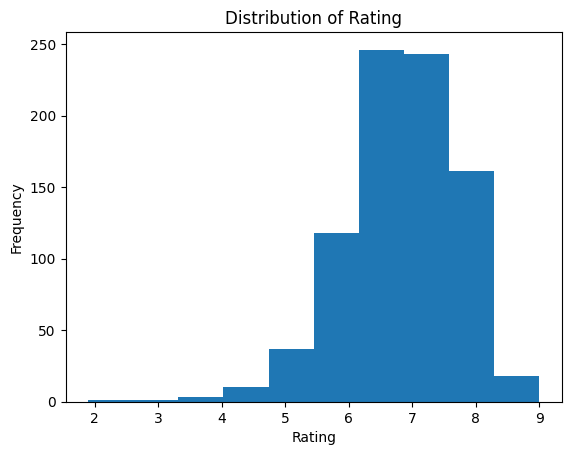

In [31]:
plt.hist(df_cleaned['Rating'], bins=10)
plt.title('Distribution of Rating')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

### 17. Vuelve a describir el dataframe y observa la media de la variable `Ratings`

In [32]:
df_cleaned.describe()

,Rank,Year,Runtime_Minutes,Rating,Votes,Revenue_Millions,Metascore
count,838.000000,838.00000,838.000000,838.000000,8.380000e+02,838.000000,838.000000
mean,485.247017,2012.50716,114.638425,6.814320,1.932303e+05,84.564558,59.575179
std,286.572065,3.17236,18.470922,0.877754,1.930990e+05,104.520227,16.952416
min,1.000000,2006.00000,66.000000,1.900000,1.780000e+02,0.000000,11.000000
25%,238.250000,2010.00000,101.000000,6.300000,6.127650e+04,13.967500,47.000000
50%,475.500000,2013.00000,112.000000,6.900000,1.368795e+05,48.150000,60.000000
75%,729.750000,2015.00000,124.000000,7.500000,2.710830e+05,116.800000,72.000000
max,1000.000000,2016.00000,187.000000,9.000000,1.791916e+06,936.630000,100.000000


### 18. Calcula este promedio con Numpy y después con un método de Pandas

In [33]:
import numpy as np

numpy_mean_rating = np.mean(df_cleaned['Rating'])
pandas_mean_rating = df_cleaned['Rating'].mean()

print(f"Average Rating (Numpy): {numpy_mean_rating:.4f}")
print(f"Average Rating (Pandas): {pandas_mean_rating:.4f}")

Average Rating (Numpy): 6.8143
Average Rating (Pandas): 6.8143


### 19. Obten los valores únicos de la variable Rating y después ordénalos de menor a mayor

In [34]:
unique_ratings = df_cleaned['Rating'].unique()
sorted_unique_ratings = np.sort(unique_ratings)
print("Unique Ratings (sorted):")
print(sorted_unique_ratings)

Unique Ratings (sorted):
[1.9 2.7 3.9 4.  4.1 4.3 4.4 4.6 4.7 4.8 4.9 5.  5.1 5.2 5.3 5.4 5.5 5.6
 5.7 5.8 5.9 6.  6.1 6.2 6.3 6.4 6.5 6.6 6.7 6.8 6.9 7.  7.1 7.2 7.3 7.4
 7.5 7.6 7.7 7.8 7.9 8.  8.1 8.2 8.3 8.4 8.5 8.6 8.8 9. ]


### 20. Observa los ratings que te interesen y ahora filtra el dataframe con ese rating para ver cuáles son las películas con dicho rating

In [35]:
# Replace '7.5' with any rating from the sorted_unique_ratings that you are interested in
rating_of_interest = 7.5

movies_with_specific_rating = df_cleaned[df_cleaned['Rating'] == rating_of_interest]
display(f"Movies with a rating of {rating_of_interest}:")
display(movies_with_specific_rating)

'Movies with a rating of 7.5:'

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime_Minutes,Rating,Votes,Revenue_Millions,Metascore
10,11,Fantastic Beasts and Where to Find Them,"Adventure,Family,Fantasy",The adventures of writer Newt Scamander in New...,David Yates,"Eddie Redmayne, Katherine Waterston, Alison Su...",2016,133,7.5,232072,234.02,66.0
31,32,Nocturnal Animals,"Drama,Thriller",A wealthy art gallery owner is haunted by her ...,Tom Ford,"Amy Adams, Jake Gyllenhaal, Michael Shannon, A...",2016,116,7.5,126030,10.64,67.0
41,42,Moonlight,Drama,"A chronicle of the childhood, adolescence and ...",Barry Jenkins,"Mahershala Ali, Shariff Earp, Duan Sanderson, ...",2016,111,7.5,135095,27.85,99.0
59,60,Sully,"Biography,Drama","The story of Chesley Sullenberger, an American...",Clint Eastwood,"Tom Hanks, Aaron Eckhart, Laura Linney, Valeri...",2016,96,7.5,137608,125.07,74.0
68,69,Wakefield,Drama,A man's nervous breakdown causes him to leave ...,Robin Swicord,"Bryan Cranston, Jennifer Garner, Beverly D'Ang...",2016,106,7.5,291,0.01,61.0
72,73,A Monster Calls,"Drama,Fantasy",A boy seeks the help of a tree monster to cope...,J.A. Bayona,"Lewis MacDougall, Sigourney Weaver, Felicity J...",2016,108,7.5,39134,3.73,76.0
125,126,The Jungle Book,"Adventure,Drama,Family",After a threat from the tiger Shere Khan force...,Jon Favreau,"Neel Sethi, Bill Murray, Ben Kingsley, Idris Elba",2016,106,7.5,198243,364.00,77.0
158,159,Scott Pilgrim vs. the World,"Action,Comedy,Fantasy",Scott Pilgrim must defeat his new girlfriend's...,Edgar Wright,"Michael Cera, Mary Elizabeth Winstead, Kieran ...",2010,112,7.5,291457,31.49,69.0
174,175,Frozen,"Animation,Adventure,Comedy",When the newly crowned Queen Elsa accidentally...,Chris Buck,"Kristen Bell, Idina Menzel, Jonathan Groff, Jo...",2013,102,7.5,451894,400.74,74.0
206,207,Raw (II),"Drama,Horror",When a young vegetarian undergoes a carnivorou...,Julia Ducournau,"Garance Marillier, Ella Rumpf, Rabah Nait Oufe...",2016,99,7.5,5435,0.51,81.0


### 21. Obten los valores únicos de la variable Rating y la frecuencia total de cada uno de estos valores. Posteriormente crea un nuevo dataframe con essos valores

In [36]:
rating_counts = df_cleaned['Rating'].value_counts()
ratings_df = pd.DataFrame({'Rating': rating_counts.index, 'Frequency': rating_counts.values})
display(ratings_df)

,Rating,Frequency
0,7.0,43
1,6.7,42
2,7.1,40
3,7.8,38
4,7.2,38
5,6.6,37
6,7.3,37
7,6.3,36
8,6.5,35
9,6.2,33


### 22. Ordena el nuevo dataframe por la variable `rating`

In [37]:
ratings_df_sorted = ratings_df.sort_values(by='Rating').reset_index(drop=True)
display(ratings_df_sorted)

,Rating,Frequency
0,1.9,1
1,2.7,1
2,3.9,2
3,4.0,1
4,4.1,1
5,4.3,3
6,4.4,1
7,4.6,2
8,4.7,3
9,4.8,1


### 23. Crea una gráfica de barras con este nuevo dataframe ordenado

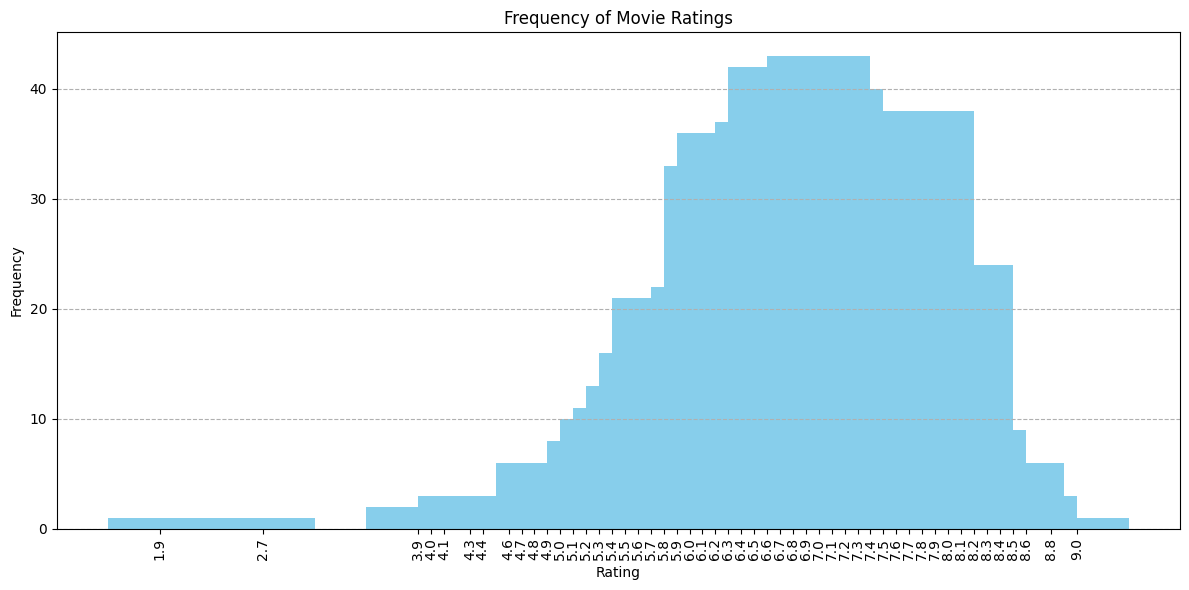

In [38]:
plt.figure(figsize=(12, 6))
plt.bar(ratings_df_sorted['Rating'], ratings_df_sorted['Frequency'], color='skyblue')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.title('Frequency of Movie Ratings')
plt.xticks(ratings_df_sorted['Rating'], rotation=90) # Rotate labels for better readability
plt.grid(axis='y', linestyle='--')
plt.tight_layout()
plt.show()

### 24. Crea la matriz de correlación del dataframe de películas

In [39]:
correlation_matrix = df_cleaned.corr(numeric_only=True)
display(correlation_matrix)

,Rank,Year,Runtime_Minutes,Rating,Votes,Revenue_Millions,Metascore
Rank,1.000000,-0.312809,-0.254783,-0.243125,-0.303284,-0.273170,-0.195909
Year,-0.312809,1.000000,-0.101933,-0.145703,-0.362445,-0.129198,-0.062303
Runtime_Minutes,-0.254783,-0.101933,1.000000,0.374566,0.399298,0.281721,0.221397
Rating,-0.243125,-0.145703,0.374566,1.000000,0.517452,0.217106,0.672731
Votes,-0.303284,-0.362445,0.399298,0.517452,1.000000,0.636833,0.332674
Revenue_Millions,-0.273170,-0.129198,0.281721,0.217106,0.636833,1.000000,0.142397
Metascore,-0.195909,-0.062303,0.221397,0.672731,0.332674,0.142397,1.000000


### 25. Grafica la matriz de correlación utilizando `matshow()`

/tmp/ipython-input-3113279569.py:6: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


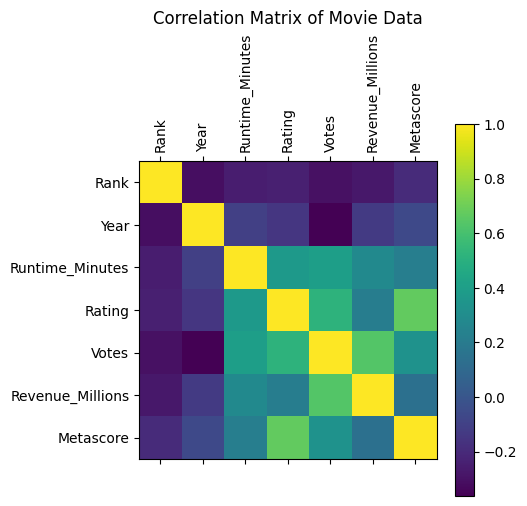

In [40]:
plt.matshow(correlation_matrix)
plt.xticks(range(correlation_matrix.shape[1]), correlation_matrix.columns, rotation=90)
plt.yticks(range(correlation_matrix.shape[1]), correlation_matrix.columns)
plt.colorbar()
plt.title('Correlation Matrix of Movie Data')
plt.tight_layout()
plt.show()